In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model, Sequential
import numpy as np
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
encoding_dim = 32

### load dataset

In [3]:
dataset_path = os.path.join("..", "assignment_4")
dataset_path = os.path.join(dataset_path, "dataset")
dataset_path = os.path.join(dataset_path, "mnist.npz")

dataset = np.load(dataset_path)
x_train = dataset["x_train"].astype('float32') / 255
x_test = dataset["x_test"].astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print("x_train.shape : ", x_train.shape)
print("x_test.shape : ", x_test.shape)

x_train.shape :  (60000, 784)
x_test.shape :  (10000, 784)


### define nn model and train

In [4]:
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size = 256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.3554 - val_loss: 0.2712
Epoch 2/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.2641 - val_loss: 0.2532
Epoch 3/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.2424 - val_loss: 0.2293
Epoch 4/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.2210 - val_loss: 0.2107
Epoch 5/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.2060 - val_loss: 0.1987
Epoch 6/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.1955 - val_loss: 0.1897
Epoch 7/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1875 - val_loss: 0.1826
Epoch 8/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.1809 - val_loss: 0.1765
Epoch 9/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1751 - val_loss: 0.1710
Epoch

### plot

In [5]:
decoded_imgs = autoencoder.predict(x_test)

In [6]:
def plot(x_test, decoded_imgs = None):
    
    num = 10
    plt.figure(figsize=(20, 4))
    
    plt.gray()
    
    for i in range(num):
        ax = plt.subplot(2, num, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.axis("off")
        
        if decoded_imgs is not None:
            
            ax = plt.subplot(2, num, i + num + 1)
            plt.imshow(decoded_imgs[i].reshape(28, 28))
            plt.axis("off")
    
    plt.show()

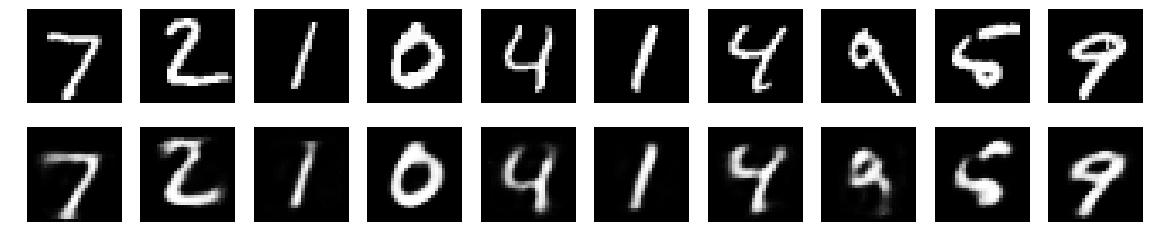

In [7]:
plot(x_test, decoded_imgs)

### load dataset again

In [8]:
x_train = dataset["x_train"].astype('float32') / 255
x_test = dataset["x_test"].astype('float32') / 255
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(size = x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

### plot noise pic

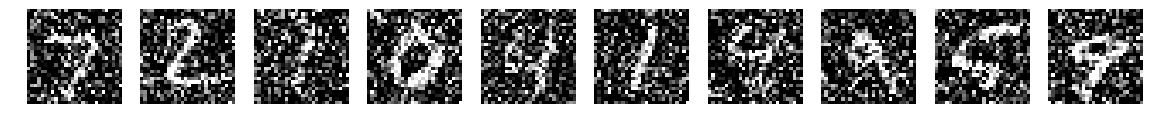

In [9]:
plot(x_test_noisy)

### define conv model

In [10]:
autoencoder = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(padding='same'),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(padding='same'),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    UpSampling2D(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    UpSampling2D(),
    Conv2D(1, (3,3), activation='sigmoid', padding='same')
])

autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)       

In [11]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train,
               epochs=30,
               batch_size=128,
               shuffle=True,
               validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 115s 2ms/step - loss: 0.1743 - val_loss: 0.1238
Epoch 2/30
60000/60000 [==============================] - 116s 2ms/step - loss: 0.1180 - val_loss: 0.1103
Epoch 3/30
60000/60000 [==============================] - 118s 2ms/step - loss: 0.1116 - val_loss: 0.1062
Epoch 4/30
60000/60000 [==============================] - 118s 2ms/step - loss: 0.1082 - val_loss: 0.1046
Epoch 5/30
60000/60000 [==============================] - 118s 2ms/step - loss: 0.1055 - val_loss: 0.1037
Epoch 6/30
60000/60000 [==============================] - 118s 2ms/step - loss: 0.1042 - val_loss: 0.1024
Epoch 7/30
60000/60000 [==============================] - 117s 2ms/step - loss: 0.1030 - val_loss: 0.1004
Epoch 8/30
60000/60000 [==============================] - 118s 2ms/step - loss: 0.1022 - val_loss: 0.1000
Epoch 9/30
60000/60000 [==============================] - 118s 2ms/step - loss: 0.1013 - val_loss: 0.1

### plot the result

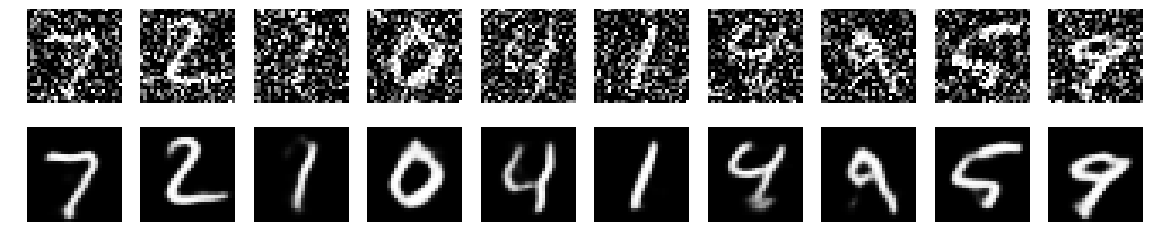

In [12]:
plot(x_test_noisy, autoencoder.predict(x_test_noisy))